In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [5]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
df = pd.read_csv(url, header=None)

In [6]:
# Set column names
df.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']

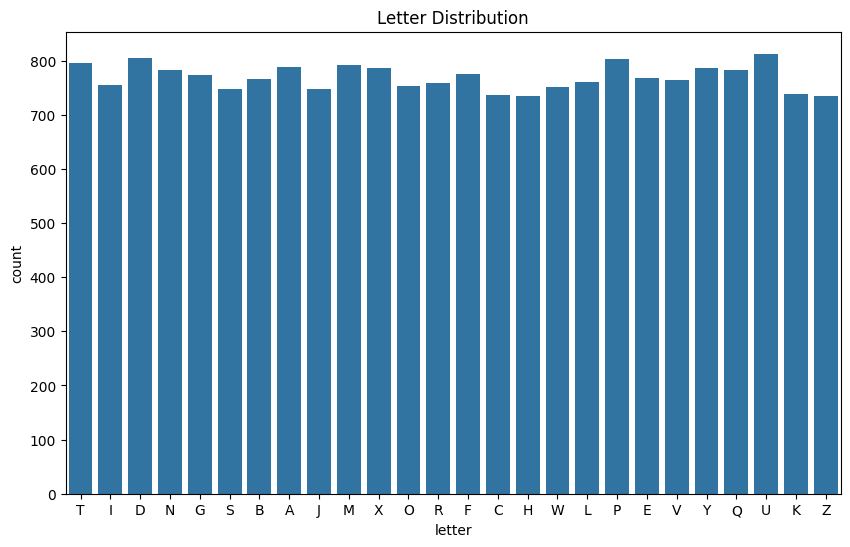

In [7]:
# Visualize letter distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='letter', data=df)
plt.title('Letter Distribution')
plt.show()

In [8]:
# Convert letters to numerical labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['letter'])

In [9]:
# Drop 'letter' column
df.drop(columns=['letter'], inplace=True)

In [10]:
# Splitting the data into features and target
X = df.drop('label', axis=1)
y = df['label']

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(26, activation='softmax')  # 26 classes for 26 letters
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


2024-02-13 16:51:55.971739: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-13 16:51:55.973137: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-13 16:51:55.997465: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-13 16:51:55.997794: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-13 16:51:56.389476: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Epoch 1/20


2024-02-13 16:51:56.808005: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-13 16:51:56.812447: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


450/450 [==============================] - 1s 817us/step - loss: 1.7079 - accuracy: 0.5210 - val_loss: 1.1177 - val_accuracy: 0.6844
Epoch 2/20
450/450 [==============================] - 0s 529us/step - loss: 0.9348 - accuracy: 0.7356 - val_loss: 0.8231 - val_accuracy: 0.7706
Epoch 3/20
450/450 [==============================] - 0s 570us/step - loss: 0.7437 - accuracy: 0.7881 - val_loss: 0.6781 - val_accuracy: 0.8106
Epoch 4/20
450/450 [==============================] - 0s 764us/step - loss: 0.6430 - accuracy: 0.8099 - val_loss: 0.6139 - val_accuracy: 0.8181
Epoch 5/20
450/450 [==============================] - 0s 498us/step - loss: 0.5698 - accuracy: 0.8244 - val_loss: 0.5286 - val_accuracy: 0.8450
Epoch 6/20
450/450 [==============================] - 0s 896us/step - loss: 0.5115 - accuracy: 0.8456 - val_loss: 0.5304 - val_accuracy: 0.8338
Epoch 7/20
450/450 [==============================] - 0s 950us/step - loss: 0.4595 - accuracy: 0.8592 - val_loss: 0.4684 - val_accuracy: 0.8575
Epo